In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
full_table = pd.read_csv("../../data/processed/full_data_for_ml.csv")
full_table = full_table.drop(columns=["Unnamed: 0","steamId"])
full_table

,sales,averageRevenue,medianRevenue,publishedGames,price,earlyAccess,Accounting,Action,Adventure,Animation & Modeling,...,Steam Timeline,Steam Trading Cards,Steam Turn Notifications,Steam Workshop,SteamVR Collectibles,Tracked Controller Support,VR Only,VR Supported,Valve Anti-Cheat enabled,indie
0,8.404149,0.453316,0.587113,0.466248,0.451984,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True
1,13.475520,0.762018,0.493235,0.227723,0.647464,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,True
2,6.207449,0.333886,0.521493,0.000000,0.337546,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,3.663562,0.450807,0.620089,0.166560,0.451984,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
4,11.548621,0.762480,0.829376,0.073704,0.573996,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17785,3.610918,0.000000,0.186124,0.656380,0.129757,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,True
17786,4.343805,0.234036,0.347340,0.479719,0.260932,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
17787,7.483244,0.271885,0.492761,0.125998,0.303104,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
17788,2.772589,0.214907,0.398674,0.498221,0.337546,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True


In [4]:
X_full = full_table.drop(columns="sales").values
Y_full = full_table['sales'].values

In [11]:
# 假設 X 是特徵變量, y 是目標變量
X_train, X_test, y_train, y_test = train_test_split(X_full, Y_full, test_size=0.2, random_state=42)

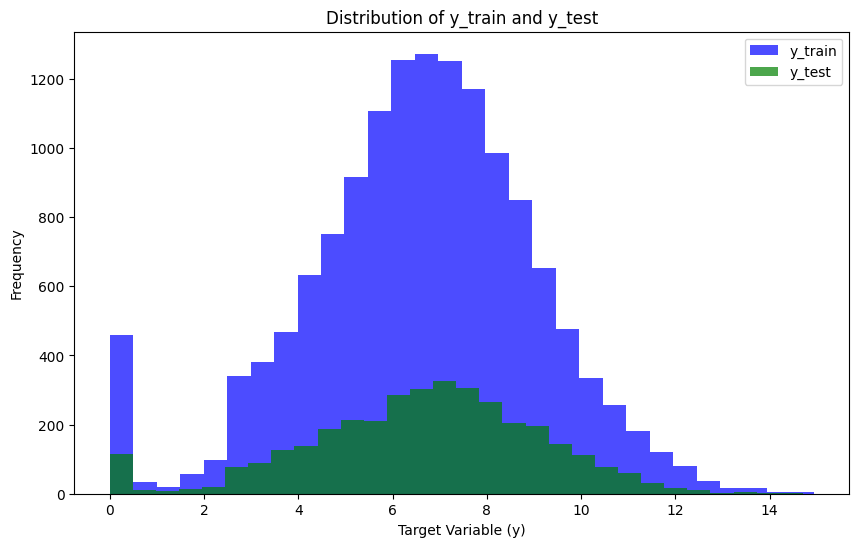

In [12]:
import matplotlib.pyplot as plt

# 當 y_train 和 y_test 定義後，可以使用如下代碼繪製圖表

plt.figure(figsize=(10,6))

# 繪製 y_train 的分布
plt.hist(y_train, bins=30, alpha=0.7, label='y_train', color='blue')

# 繪製 y_test 的分布
plt.hist(y_test, bins=30, alpha=0.7, label='y_test', color='green')

# 添加標籤和標題
plt.xlabel('Target Variable (y)')
plt.ylabel('Frequency')
plt.title('Distribution of y_train and y_test')
plt.legend()

# 顯示圖表
plt.show()


In [80]:
tree_depth = 11
# 初始化決策樹回歸模型
tree_regressor = DecisionTreeRegressor(max_depth=tree_depth)

# 訓練模型
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11)

In [81]:
# 預測測試集
y_pred = tree_regressor.predict(X_test)
y_pred_train = tree_regressor.predict(X_train)
# 評估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f'train Mean Squared Error (MSE): {mse_train}')
print(f'train R-squared (R²): {r2_train}')
print(f'test Mean Squared Error (MSE): {mse}')
print(f'test R-squared (R²): {r2}')

train Mean Squared Error (MSE): 1.6971953177701682
train R-squared (R²): 0.7187018168380033
test Mean Squared Error (MSE): 2.730769580597466
test R-squared (R²): 0.556317463955033


In [45]:
feature_names = full_table.drop(columns="sales").columns.tolist()


['averageRevenue',
 'medianRevenue',
 'publishedGames',
 'price',
 'earlyAccess',
 'Accounting',
 'Action',
 'Adventure',
 'Animation & Modeling',
 'Audio Production',
 'Casual',
 'Design & Illustration',
 'Early Access',
 'Education',
 'Game Development',
 'Indie',
 'Massively Multiplayer',
 'RPG',
 'Racing',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Utilities',
 'Video Production',
 '1980s',
 "1990's",
 '2.5D',
 '2D',
 '2D Fighter',
 '2D Platformer',
 '360 Video',
 '3D',
 '3D Fighter',
 '3D Platformer',
 '3D Vision',
 '4 Player Local',
 '4X',
 '6DOF',
 '8-bit Music',
 'ATV',
 'Abstract',
 'Action RPG',
 'Action RTS',
 'Action Roguelike',
 'Action-Adventure',
 'Addictive',
 'Agriculture',
 'Aliens',
 'Alternate History',
 'Ambient',
 'America',
 'Anime',
 'Arcade',
 'Archery',
 'Arena Shooter',
 'Artificial Intelligence',
 'Assassin',
 'Asymmetric VR',
 'Asynchronous Multiplayer',
 'Atmospheric',
 'Auto Battler',
 'Automation',
 'Automobile Sim',
 'BMX',
 'Base Bu

In [ ]:
from sklearn.tree import export_text

# 假設你的數據存儲在 pandas DataFrame 中
# X 是特徵數據
# feature_names = full_table.columns.tolist()  # 獲取特徵名稱

# 顯示決策樹的文本表示，並傳入 feature_names
tree_text = export_text(tree_regressor, feature_names=feature_names)

print(tree_text)

In [83]:
from sklearn.tree import export_text

# 假設你的數據已經訓練好模型並且特徵名稱可用
tree_text = export_text(tree_regressor, feature_names=feature_names)

# 創建一個字典來存儲每一層的特徵名稱
tree_layers = {}

# 將每一行進行分割並根據縮排來判斷所屬層級
for line in tree_text.split('\n'):
    # 計算每行的縮排，決定該行屬於第幾層 (| 表示層級)
    level = line.count('|')
    
    # 提取該行的特徵名稱，排除空行及沒有特徵名稱的行
    if '<=' in line or '>' in line:
        # 去除空格並找到 '--- ' 到 '<=' 或 '>' 之間的特徵名稱
        feature = line.split('--- ')[1].split(' <=')[0].split(' >')[0]
        
        # 將特徵名稱存儲在對應的層級中
        if level not in tree_layers:
            tree_layers[level] = []
        if feature not in tree_layers[level]:  # 防止重複加入
            tree_layers[level].append(feature)
count=0
# 顯示每一層的特徵名稱
for level, features in tree_layers.items():
    print(f"Level {level}: {features}")
    count += len(features)
print(count)


Level 1: ['medianRevenue']
Level 2: ['medianRevenue']
Level 3: ['Steam Achievements', 'Profile Features Limited', 'medianRevenue']
Level 4: ['publishedGames', 'Profile Features Limited', 'price', 'medianRevenue']
Level 5: ['Profile Features Limited', 'medianRevenue', 'averageRevenue', 'Steam Trading Cards', 'publishedGames', 'NSFW', 'RPG', 'price', 'Board Game', 'Roguelite', 'Steam Cloud']
Level 6: ['medianRevenue', '3D', 'Shooter', 'Realistic', '2D', 'price', 'publishedGames', 'Horror', 'Steam Achievements', 'America', 'Steam Trading Cards', 'Great Soundtrack', 'Psychological Horror', 'averageRevenue', 'Runner', 'Nonlinear', 'Motorbike', 'Online Co-op', 'Family Friendly', 'Singleplayer', "Shoot 'Em Up"]
Level 7: ['Lore-Rich', 'Grid-Based Movement', 'medianRevenue', 'Difficult', 'earlyAccess', 'Survival', 'Classic', "Shoot 'Em Up", 'Puzzle Platformer', 'price', 'averageRevenue', 'VR Supported', 'Score Attack', 'Hidden Object', 'publishedGames', 'Cross-Platform Multiplayer', 'Relaxing',

In [68]:
features_tuple = tuple(tree_layers.values)

TypeError: 'builtin_function_or_method' object is not iterable

In [84]:
features_set = set()

# 只遍歷 key 1-6
for level in range(1, tree_depth+1):
    if level in tree_layers:
        features_set.update(tree_layers[level])  # 使用 set 自動去重

# 將 set 轉換為 tuple
features_tuple = tuple(features_set)

# 計算 tuple 裡的總數量
total_features = len(features_set)

# 顯示 tuple 和總數量
print(f"Features set: {features_set}")
print(f"Total number of features: {total_features}")

Features set: {'America', 'Sniper', 'Pixel Graphics', 'Open World', 'Nudity', "1990's", 'Horror', 'Cats', 'Anime', 'Stats', 'Turn-Based Tactics', 'Female Protagonist', 'Aliens', 'Third Person', 'Immersive Sim', 'Nature', 'Loot', 'Conversation', 'Shooter', 'Steam Trading Cards', 'Nonlinear', 'Point & Click', 'VR Supported', 'Hidden Object', 'Third-Person Shooter', 'Online Co-Op', 'Roguelite', 'Online PvP', 'Dark Humor', 'Gore', 'Dungeon Crawler', 'Top-Down Shooter', 'Logic', 'Puzzle Platformer', 'medianRevenue', 'publishedGames', 'Werewolves', 'Destruction', 'Foreign', 'Cute', 'Medieval', 'Trading', 'Fantasy', 'Horses', 'Realistic', 'Trains', 'Vampire', 'Western', 'Atmospheric', 'Retro', 'Multiplayer', 'Precision Platformer', 'Investigation', 'LGBTQ+', 'Class-Based', 'Real-Time', 'Profile Features Limited', 'Roguelike', 'earlyAccess', 'Psychological Horror', 'Boxing', 'Memes', 'Steam Workshop', 'Linear', 'Cross-Platform Multiplayer', 'Family Friendly', 'Adventure', 'SteamVR Collectibles

In [99]:
full_table.iloc[:,:1]

,sales
0,8.404149
1,13.475520
2,6.207449
3,3.663562
4,11.548621
...,...
17785,3.610918
17786,4.343805
17787,7.483244
17788,2.772589


In [98]:
# 提取 full_table 的第 5 列開始的所有列
subset = full_table

# 找到 subset 中與 feature_set 交集的列
filtered_columns = subset.columns.intersection(features_set)

# 只保留 feature_set 中存在的列
filtered_subset = subset[filtered_columns]

# 顯示結果
filtered_subset.to_csv("../../data/processed/df_for_mldl_moderated_by_tree.csv")

In [101]:
import pandas as pd

# 提取 full_table 的第一列
first_column = full_table.iloc[:, :1]

# 將第一列與 filtered_subset 合併
new_table = pd.concat([first_column, filtered_subset], axis=1)

# 顯示新表格
new_table.to_csv("../../data/processed/df_for_mldl_moderated_by_tree.csv")